In [1]:
import sys # required for relative imports in jupyter lab
sys.path.insert(0, '../') 

from cosmosis.model import FFNet
from cosmosis.learning import Learn, Selector
from cosmosis.dataset import SKDS

from dataset import QM7, QM7b, QM7X, QM9, ANI1x

from torch.optim import Adam
from torch.nn import MSELoss, L1Loss
from torch.optim.lr_scheduler import ReduceLROnPlateau

CDataset created...
SKDS make_regression created...
CModel loaded...
FFNet model loaded...
learning time: 0:00:02.188175
epoch: 0, lr: 0.01
train loss: 34152.80114293982, val loss: 24690.0875
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:08.424913
epoch: 10, lr: 0.005
train loss: 597.0211520724827, val loss: 687.2386352539063
sklearn train metric: 0, sklearn validation metric: 0
test loss: 420.70673828125
learning time: 0:00:14.297121
sklearn test metric: 
0 



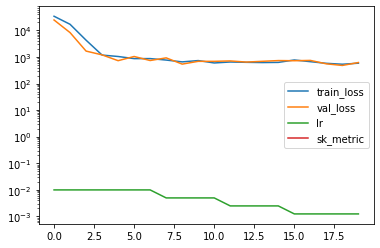

In [2]:
model_params = {'D_in': 128, 
                'H': 512, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'train_params': {'features': ['X'],
                              'targets': ['y'],
                              'features_dtype': 'float32',
                              'targets_dtype': 'float32',
                              'make': 'make_regression',
                              'transform': [],
                              'target_transform': [],
                              'sk_params': {'n_samples': 10000,
                                            'n_features': 128}}}

metrics_params = {'report_interval': 10}

opt_params = {'lr': 0.01}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7, .15)}

sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 1}

l = Learn([SKDS], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=MSELoss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=256, epochs=20)

CDataset created...
CModel loaded...
FFNet model loaded...
learning time: 0:00:00.986099
epoch: 0, lr: 0.01
train loss: 1531.1773296155427, val loss: 1501.3780212402344
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:09.393469
epoch: 10, lr: 0.01
train loss: 34.820985292133535, val loss: 33.02261304855347
sklearn train metric: 0, sklearn validation metric: 0
test loss: 32.56827735900879
learning time: 0:00:17.148308
sklearn test metric: 
0 



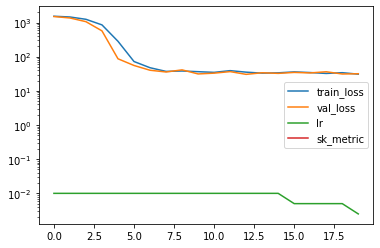

In [3]:
model_params = {'D_in': 23*23+23*32, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel',
                'embed_params': [('atoms',7,32,None,True)]}

ds_params = {'train_params': {'features': ['coulomb'],
                              'targets': ['ae'],
                              'embeds': ['atoms'],
                              'in_file': './data/qm7/qm7.mat',
                              'flatten': True}}

metrics_params = {'report_interval': 10}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 1}

opt_params = {'lr': 0.01}

l = Learn([QM7], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=256, epochs=20)

CDataset created...
CModel loaded...
FFNet model loaded...
learning time: 0:00:00.667933
epoch: 0, lr: 0.01
train loss: 1562.2641794305098, val loss: 1545.4869079589844
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:06.878132
epoch: 10, lr: 0.01
train loss: 56.66576646503649, val loss: 63.545637130737305
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:12.970592
epoch: 20, lr: 0.01
train loss: 46.67246587652909, val loss: 54.98154163360596
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:18.944019
epoch: 30, lr: 0.01
train loss: 43.37554289165296, val loss: 53.04325294494629
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:25.045913
epoch: 40, lr: 0.005
train loss: 39.46923828125, val loss: 52.1965274810791
sklearn train metric: 0, sklearn validation metric: 0
test loss: 52.94587993621826
learning time: 0:00:30.715088
sklearn test metric: 
0 



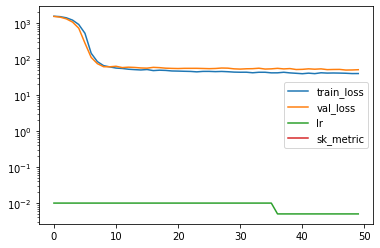

In [4]:
model_params = {'D_in': 23*23, 
                'H': 2048, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'train_params': {'features': ['coulomb'],
                              'targets': ['E'],
                              'in_file': './data/qm7b/qm7b.mat',
                              'flatten': True}}

metrics_params = {'report_interval': 10}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 2}

opt_params = {'lr': 0.01}

l = Learn([QM7b], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=256, epochs=50)

In [5]:
#find the longest molecule

ds_params = {'train_params': {'features': ['atNUM'],
                              'pad': None,
                              'targets': [],
                              'embeds': [],
                              'selector': ['opt']}}

qm7x = QM7X(**ds_params['train_params'])
l = 0
for i in qm7x.ds_idx:
    s = qm7x[i][0].shape[0]
    if s > l:
        l = s
print('longest molecule length: ', l)

qm7x[1]

mapping...  <HDF5 file "1000.hdf5" (mode r)>
mapping...  <HDF5 file "2000.hdf5" (mode r)>
mapping...  <HDF5 file "3000.hdf5" (mode r)>
mapping...  <HDF5 file "4000.hdf5" (mode r)>
mapping...  <HDF5 file "5000.hdf5" (mode r)>
mapping...  <HDF5 file "6000.hdf5" (mode r)>
mapping...  <HDF5 file "7000.hdf5" (mode r)>
mapping...  <HDF5 file "8000.hdf5" (mode r)>
molecular formula (idmol) mapped:  6950
total molecular structures (idconf) mapped:  41537
CDataset created...
longest molecule length:  23


(array([6., 1., 1., 1., 1.], dtype=float32), [], [])

mapping...  <HDF5 file "1000.hdf5" (mode r)>
mapping...  <HDF5 file "2000.hdf5" (mode r)>
mapping...  <HDF5 file "3000.hdf5" (mode r)>
mapping...  <HDF5 file "4000.hdf5" (mode r)>
mapping...  <HDF5 file "5000.hdf5" (mode r)>
mapping...  <HDF5 file "6000.hdf5" (mode r)>
mapping...  <HDF5 file "7000.hdf5" (mode r)>
mapping...  <HDF5 file "8000.hdf5" (mode r)>
molecular formula (idmol) mapped:  6950
total molecular structures (idconf) mapped:  41537
CDataset created...
CModel loaded...
FFNet model loaded...
learning time: 0:00:01.184295
epoch: 0, lr: 0.01
train loss: 66.04109051353053, val loss: 44.24327373504639
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:11.434268
epoch: 10, lr: 0.01
train loss: 2.2258850461558293, val loss: 2.198926031589508
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:21.584279
epoch: 20, lr: 0.005
train loss: 2.456191288797479, val loss: 2.587306022644043
sklearn train metric: 0, sklearn validation metric: 0


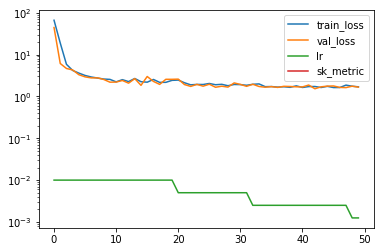

In [6]:
model_params = {'D_in': 23*23+23*64, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel',
                'embed_params': [('atNUM',9,64,None,True)]}

ds_params = {'train_params': {'features': ['distance'],
                              'pad': 23,
                              'targets': ['eAT'],
                              'embeds': ['atNUM'],
                              'selector': ['opt'],
                              'flatten': True}}

metrics_params = {'report_interval': 10}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 2}

opt_params = {'lr': 0.01}

l = Learn([QM7X], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=256, epochs=50)

creating QM9 dataset...
QM9 molecules scanned:  1
QM9 molecules created:  1
QM9 molecules scanned:  10001
QM9 molecules created:  10001
QM9 molecules scanned:  20001
QM9 molecules created:  20001
QM9 molecules scanned:  30001
QM9 molecules created:  30001
QM9 molecules scanned:  40001
QM9 molecules created:  40001
QM9 molecules scanned:  50001
QM9 molecules created:  50001
QM9 molecules scanned:  60001
QM9 molecules created:  60001
QM9 molecules scanned:  70001
QM9 molecules created:  70001
QM9 molecules scanned:  80001
QM9 molecules created:  80001
QM9 molecules scanned:  90001
QM9 molecules created:  90001
QM9 molecules scanned:  100001
QM9 molecules created:  100001
QM9 molecules scanned:  110001
QM9 molecules created:  110001
QM9 molecules scanned:  120001
QM9 molecules created:  120001
QM9 molecules scanned:  130001
QM9 molecules created:  130001
total QM9 molecules created: 133885
pickling a copy of the QM9 datadic...
CDataset created...
CModel loaded...
FFNet model loaded...
lea

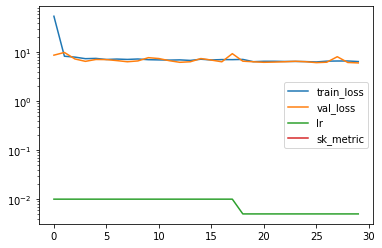

In [7]:
model_params = {'D_in': 29*29, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'train_params': {#'n': 10000, 
                              'features': ['coulomb'],
                              'embeds': [], 
                              'targets': ['U0'],
                              'pad': 29, 
                              'filter_on': None,
                              'use_pickle': 'qm9.p',
                              'flatten': True}}

metrics_params = {'report_interval': 10}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 2}

opt_params = {'lr': 0.01}

l = Learn([QM9], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=256, epochs=30)

creating QM9 dataset...
QM9 molecules scanned:  1
QM9 molecules created:  0
QM9 molecules scanned:  10001
QM9 molecules created:  1853
QM9 molecules scanned:  20001
QM9 molecules created:  4109
QM9 molecules scanned:  30001
QM9 molecules created:  5164
QM9 molecules scanned:  40001
QM9 molecules created:  8487
QM9 molecules scanned:  50001
QM9 molecules created:  10694
QM9 molecules scanned:  60001
QM9 molecules created:  15309
QM9 molecules scanned:  70001
QM9 molecules created:  20609
QM9 molecules scanned:  80001
QM9 molecules created:  25898
QM9 molecules scanned:  90001
QM9 molecules created:  32036
QM9 molecules scanned:  100001
QM9 molecules created:  38581
QM9 molecules scanned:  110001
QM9 molecules created:  46307
QM9 molecules scanned:  120001
QM9 molecules created:  54330
QM9 molecules scanned:  130001
QM9 molecules created:  58020
total QM9 molecules created: 58057
pickling a copy of the QM9 datadic...
CDataset created...
CModel loaded...
FFNet model loaded...
learning tim

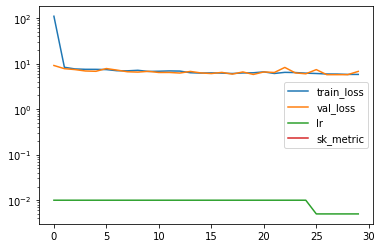

In [8]:
model_params = {'D_in': 29*29, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel',
                'embed_params': []}

ds_params = {'train_params': {'features': ['coulomb'],
                              'embeds': [],
                              'targets': ['U0'],
                              'pad': 29, 
                              'filter_on': ('n_atoms','>','18'),
                              'use_pickle': 'qm9_atoms_greater_than_10.p',
                              'flatten': True}}

crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}
sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 2}
opt_params = {'lr': 0.01}

l = Learn([QM9], FFNet, Selector, Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=256, epochs=30)

molecules loaded:  1000
molecules loaded:  2000
molecules loaded:  3000
molecules loaded:  3114
CDataset created...
CModel loaded...
FFNet model loaded...
learning time: 0:00:03.029879
epoch: 0, lr: 0.01
train loss: 564.1225334616269, val loss: 529.13818359375
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:13.171294
epoch: 4, lr: 0.01
train loss: 54.86412945915671, val loss: 43.303750356038414
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:23.213932
epoch: 8, lr: 0.01
train loss: 34.83468930861529, val loss: 27.540435155232746
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:28.174077
epoch: 10, lr: 0.01
train loss: 34.73865497813505, val loss: 30.174015045166016
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:38.343411
epoch: 14, lr: 0.005
train loss: 36.71472594317268, val loss: 31.81756591796875
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:48.355690
e

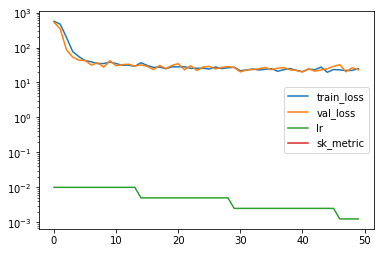

In [9]:
model_params = {'D_in': 63*63+63*32, 
                'H': 8192, 
                'D_out': 1, 
                'model_name': 'funnel',
                'embed_params': [('atomic_numbers',9,32,None,True)]}

ds_params = {'train_params': {'features': ['distance'],
                              'targets': ['wb97x_dz.energy'],
                              'embeds': ['atomic_numbers'],
                              'pad': 63, #length of the longest molecule in the dataset
                              'flatten': True,
                              'criterion': ['wb97x_dz.energy'],
                              'conformation': 'random',
                              'in_file': './data/ani1x/ani1x-release.h5'}}

metrics_params = {'report_interval': 20}

crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}
sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 5}
opt_params = {'lr': 0.01}

l = Learn([ANI1x], FFNet, Selector, Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=128, epochs=50)